# imports

In [ ]:
import os
path = os.getcwd()

if path[1:5] == 'Home':
    %run /Home/siv30/wad005/master/GRB/src/harvest_matlab_data.ipynb
    %run /Home/siv30/wad005/master/GRB/src/background_rates.ipynb
    %run /Home/siv30/wad005/master/GRB/src/dau_det_distribution.ipynb
    %run /Home/siv30/wad005/master/GRB/src/ASIMXspec.ipynb
    %run /Home/siv30/wad005/master/GRB/xspec/ASIM/ASIMFits/BAK/ASIMbak.ipynb
    %run /Home/siv30/wad005/master/GRB/xspec/ASIM/ASIMFits/PHA/ASIMpha.ipynb
    %run /Home/siv30/wad005/master/GRB/xspec/ASIM/ASIMFits/RSP/ASIMrsp.ipynb
    %run /Home/siv30/wad005/master/GRB/xspec/ASIM/ASIMFits/RSP/find_closest_DRM.ipynb

else:
    %run /Users/andreas/phys/master/GRB/src/harvest_matlab_data.ipynb
    %run /Users/andreas/phys/master/GRB/src/background_rates.ipynb
    %run /Users/andreas/phys/master/GRB/src/dau_det_distribution.ipynb
    %run /Users/andreas/phys/master/GRB/src/ASIMXspec.ipynb
    %run /Users/andreas/phys/master/GRB/xspec/ASIM/ASIMFits/BAK/ASIMbak.ipynb
    %run /Users/andreas/phys/master/GRB/xspec/ASIM/ASIMFits/PHA/ASIMpha.ipynb
    %run /Users/andreas/phys/master/GRB//xspec/ASIM/ASIMFits/RSP/ASIMrsp.ipynb
    %run /Users/andreas/phys/master/GRB//xspec/ASIM/ASIMFits/RSP/find_closest_DRM.ipynb

# Notes
    There are 3 triggers in the new trigger data (window <= 5 min)
    Triggers found at: -276, -92, 0, +80
    
    expected count rate at 25 deg mag lat is ~ 3-4k
    
    results
    ------------
    
    
    Cross Correlation
    --------------------
    tlagg = -0.302 good for binsize=16ms
    
    
    
    Use accumulated rate meter data

# Data prep

In [2]:
df_harvest = harvest_data(fn='2019_3_5_13_5_19',T0='2019-03-05T13:05:19')
df_harvest.sort_values(by='tus',inplace=True,ignore_index=True)
df_harvest

dau/det starting from index 1
tus array given in seconds
safety time:  0.175 % removed
sorted by tus (s)


,year,month,day,hour,minute,second,erg,dau,det,datetime,tus,adr,keV,st,dt,flag
0,2019,3,5,13,0,42.304672,538,3,2,2019-03-05 13:00:42.304671889,-276.695328,8,12540.190098,15.032152,13.556,False
1,2019,3,5,13,0,42.305363,413,1,1,2019-03-05 13:00:42.305363472,-276.694637,1,4176.005664,15.000000,0.000,False
2,2019,3,5,13,0,42.305405,58,3,3,2019-03-05 13:00:42.305404889,-276.694595,9,1275.020224,1.183347,733.195,False
3,2019,3,5,13,0,42.306735,1775,2,1,2019-03-05 13:00:42.306735333,-276.693265,4,32054.318525,25.821727,0.000,False
4,2019,3,5,13,0,42.306735,1855,4,3,2019-03-05 13:00:42.306735333,-276.693265,12,31504.402825,26.203522,2076.972,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42177,2019,3,5,13,6,42.324877,31,1,3,2019-03-05 13:06:42.324877167,83.324877,3,338.610798,0.000000,1110.334,False
42178,2019,3,5,13,6,42.325002,67,2,3,2019-03-05 13:06:42.325002389,83.325002,6,633.225485,2.332255,1587.972,False
42179,2019,3,5,13,6,42.325044,43,3,3,2019-03-05 13:06:42.325044222,83.325044,9,948.585259,0.897171,2646.583,False
42180,2019,3,5,13,6,42.325712,183,2,1,2019-03-05 13:06:42.325712361,83.325712,4,1239.257677,8.276041,7750.083,False


In [3]:
tus = df_harvest['tus'].to_numpy(dtype=np.float64)
ibkgstart = find_nearest(tus,-277)
ibkgend = find_nearest(tus,-274)
tus_bkg = tus[ibkgstart:ibkgend]
print('cr: ',len(tus_bkg)/(tus_bkg[-1]-tus_bkg[0]))
print('exposure: ',(tus_bkg[-1]-tus_bkg[0]))

cr:  7030.906184870927
exposure:  2.009271582999986


tus array OK ...


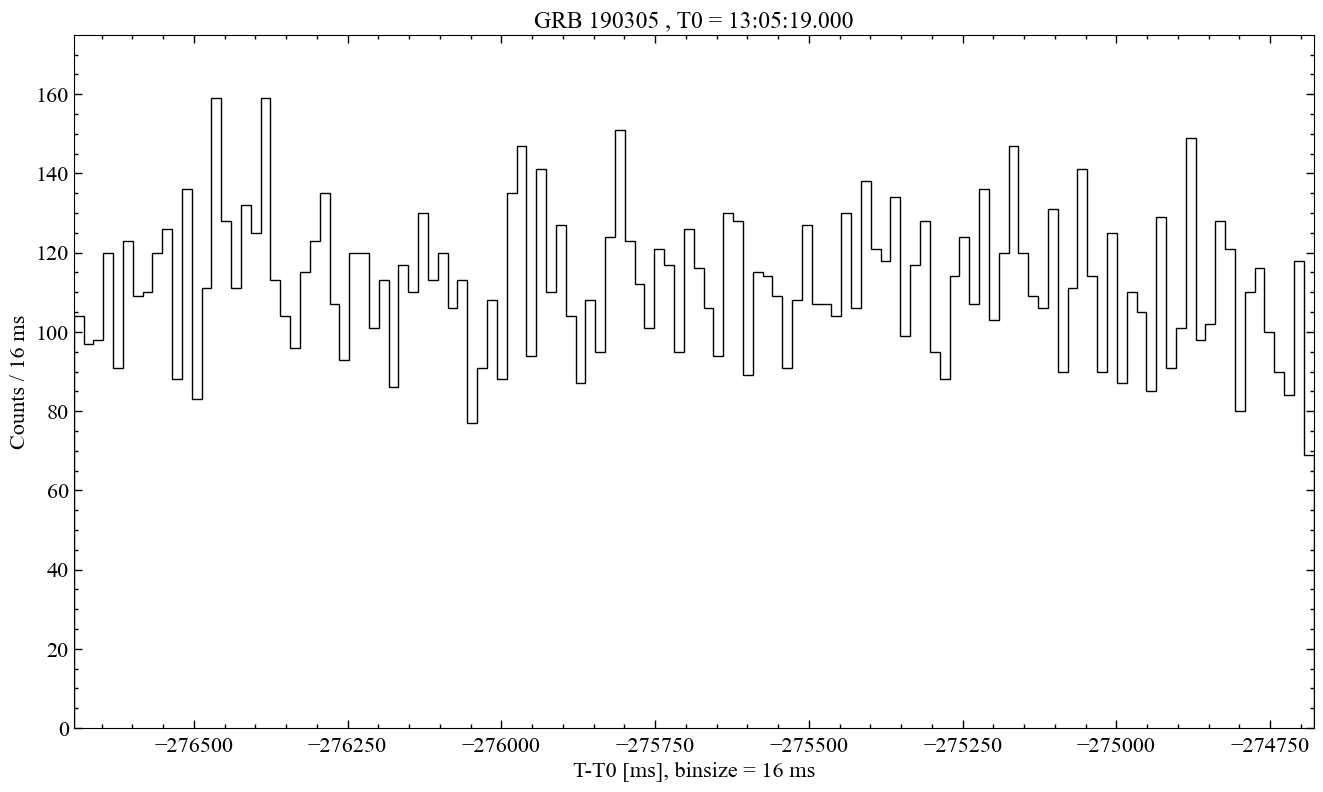

In [4]:
plot_HED(tus_arr=tus_bkg*1e6,binsize=16,T0=datetime.fromisoformat('2019-03-05T13:05:19'))

In [5]:
cr,df_bkg = get_count_rate(fn='2019_3_5_13_5_19',T0='2019-03-05T13:05:19',bkg_start=-277,bkg_end=-274)

2019-03-05 13:05:19
bkg starts and ends at:  -277 -274 s
dau/det starting from index 1
tus array given in seconds
safety time:  0.175 % removed
sorted by tus (s)
background count rate:  7030.615  counts/s
exposure:  2.009  s
returning count_rate and background df (sorted by tus (s) and st removed)


In [6]:
#use the df_bkg above to generate new bak file for burst
df_bkg

,year,month,day,hour,minute,second,erg,dau,det,datetime,tus,adr,keV,st,dt,flag
0,2019,3,5,13,0,42.304672,538,3,2,2019-03-05 13:00:42.304671889,-276.695328,8,12540.190098,15.032152,13.556,False
1,2019,3,5,13,0,42.305363,413,1,1,2019-03-05 13:00:42.305363472,-276.694637,1,4176.005664,15.000000,0.000,False
2,2019,3,5,13,0,42.305405,58,3,3,2019-03-05 13:00:42.305404889,-276.694595,9,1275.020224,1.183347,733.195,False
3,2019,3,5,13,0,42.306735,1775,2,1,2019-03-05 13:00:42.306735333,-276.693265,4,32054.318525,25.821727,0.000,False
4,2019,3,5,13,0,42.306735,1855,4,3,2019-03-05 13:00:42.306735333,-276.693265,12,31504.402825,26.203522,2076.972,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14123,2019,3,5,13,0,44.312825,53,4,3,2019-03-05 13:00:44.312825306,-274.687175,12,653.888921,1.307778,3084.000,False
14124,2019,3,5,13,0,44.312858,402,2,2,2019-03-05 13:00:44.312858028,-274.687142,5,5072.985644,15.145971,280.111,False
14125,2019,3,5,13,0,44.312989,16,3,1,2019-03-05 13:00:44.312988833,-274.687011,7,328.496708,0.000000,2985.305,False
14126,2019,3,5,13,0,44.313943,1609,3,1,2019-03-05 13:00:44.313943472,-274.686057,7,30126.198908,19.100959,954.639,False


tus array OK ...


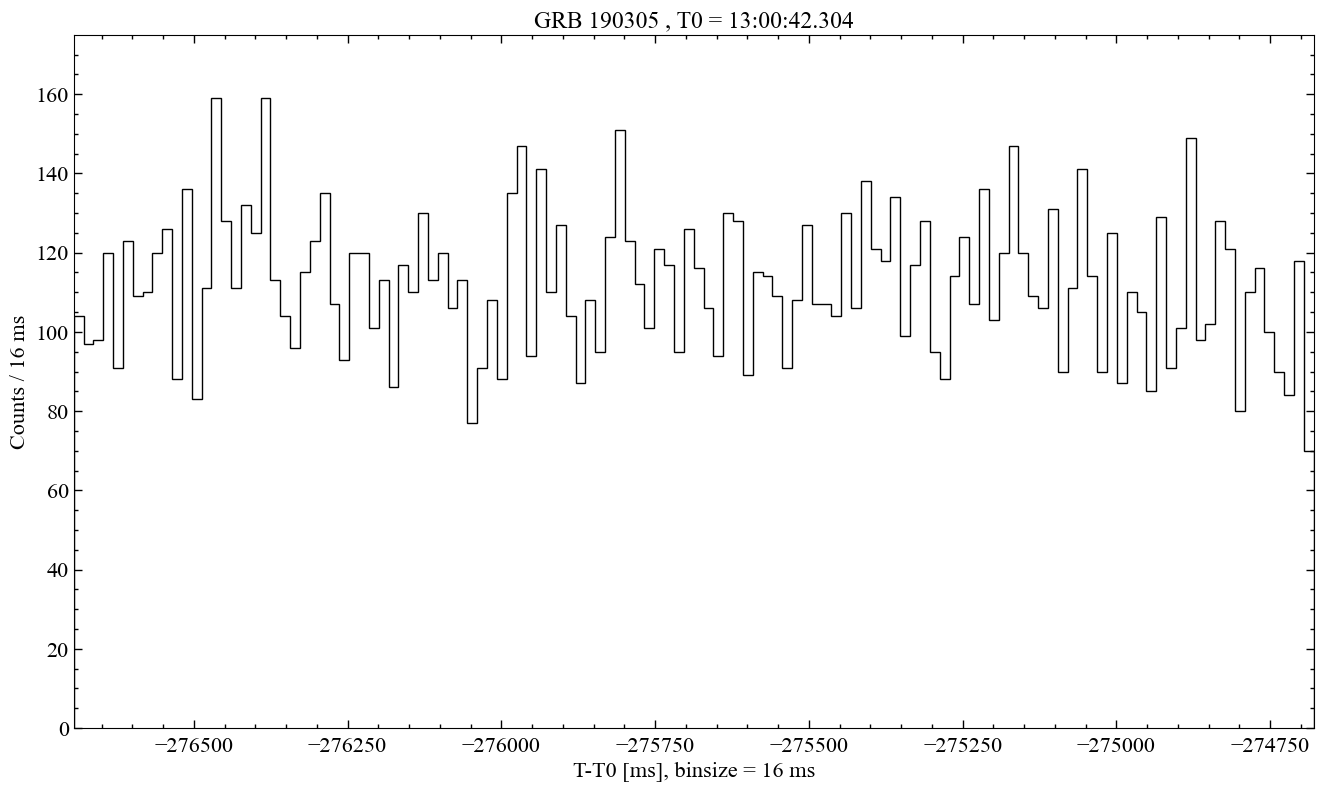

In [7]:
plot_HED(tus_arr = df_bkg['tus'].to_numpy()*1e6,T0=datetime.fromisoformat('2019-03-05T13:05:19')+timedelta(seconds=-276.695342),binsize=16)

# binning background keV

In [8]:
df_keV_bg,tus_kev = keV_hist(df=df_bkg,time_interval='max',keV_interval='max',check_LC=True,convert_seconds=False)
print('exposure: ',tus_kev[-1]-tus_kev[0])

Computing whole spectrum (10-1e5 keV)
n triggers in time interval  14127
n triggers are within bounds  14127
keV bins are set for HED
Energies binned!
exposure:  2.009271582999986


In [9]:
df_keV_bg.head()

,bins_keV,counts,poisson_error_counts
0,10.00000,0,0.0
1,12.58925,0,0.0
2,15.84893,0,0.0
3,19.95262,0,0.0
4,25.11886,0,0.0


# FITS

## BAK

In [66]:
BAK_dict = {
'USER': ['Andreas Ramsli','Username of creator of this fits file'], #<str>
'T0TIME':['2019-03-05T13:05:19','Trigger time UT format=YYYY-MM-DDThh:mm:ss.fff'], #<str> 
'TSTART': [-274.686,'[s] Start time of background spectrum accumulation'], #<float> [s] Start time of spectrum accumulation relative to T0TIME
'TSTOP': [-276.695,'End time of background spectrum accumulation'], #<float> [s]
'EXPOSURE': [2.009,'[s] Integration time in seconds for the BAK data'], #<float> 
'OBJECT': ['GRB190305A','Name of the observed object'], #<str> 
'RA_OBJ': [11.627,'[deg] RA of source'], #<float> 
'DEC_OBJ':  [-50.349,'[deg] Dec of source'], #<float>
'FILENAME': ['GRB190305A.bak','Backgorund filename for fits file'] #<str>  ('example.bak')
}
#More keys can be declated. Set generatePHA(see_template=True) to view avalible keys,values & comments from the template HDR's

In [65]:
tus_kev[-1],tus_kev[0]

(-274.686056528, -276.69534166700004)

In [68]:
bak_counts = df_keV_bg['counts'].to_numpy()[1:]
stat_err_bg = df_keV_bg['poisson_error_counts'].to_numpy()[1:]
bin_lo = df_keV_bg['bins_keV'].to_numpy()[:-1]
bin_hi = df_keV_bg['bins_keV'].to_numpy()[1:]

In [69]:
generateBAK(BAK_dict=BAK_dict, bakCounts=bak_counts, stat_err=stat_err_bg, bin_lo=bin_lo, bin_hi=bin_hi, see_headers=False)

# BURST

In [12]:
df_harvest = harvest_data(fn='2019_3_5_13_5_19',T0='2019-03-05T13:05:19')
df_harvest.sort_values(by='tus',inplace=True,ignore_index=True)

dau/det starting from index 1
tus array given in seconds
safety time:  0.154 % removed
tus given in seconds


tus array OK ...


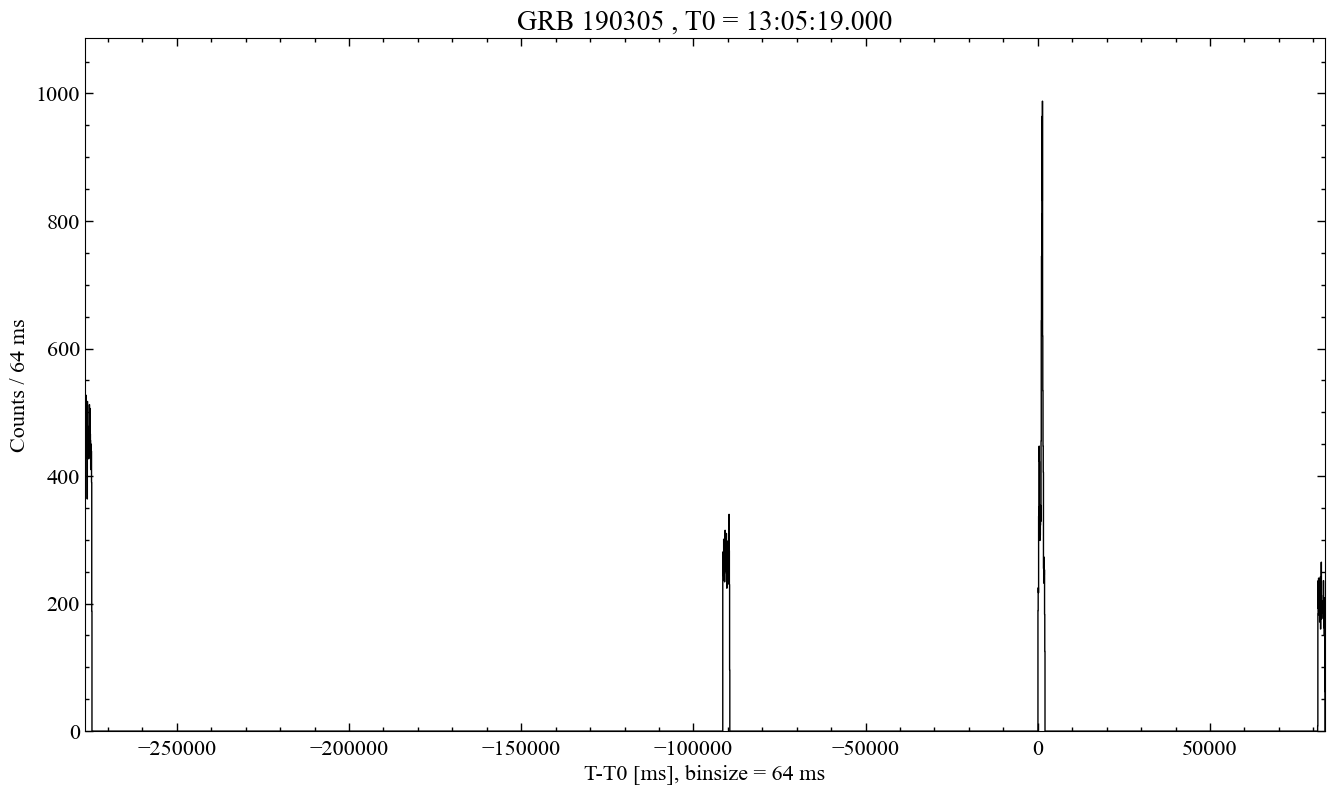

In [13]:
plot_HED(tus_arr=df_harvest['tus'].to_numpy()*1e6,binsize=64,T0=datetime.fromisoformat('2019-03-05T13:05:19'))

0.058593278000000006 2.067231917
tus array OK ...


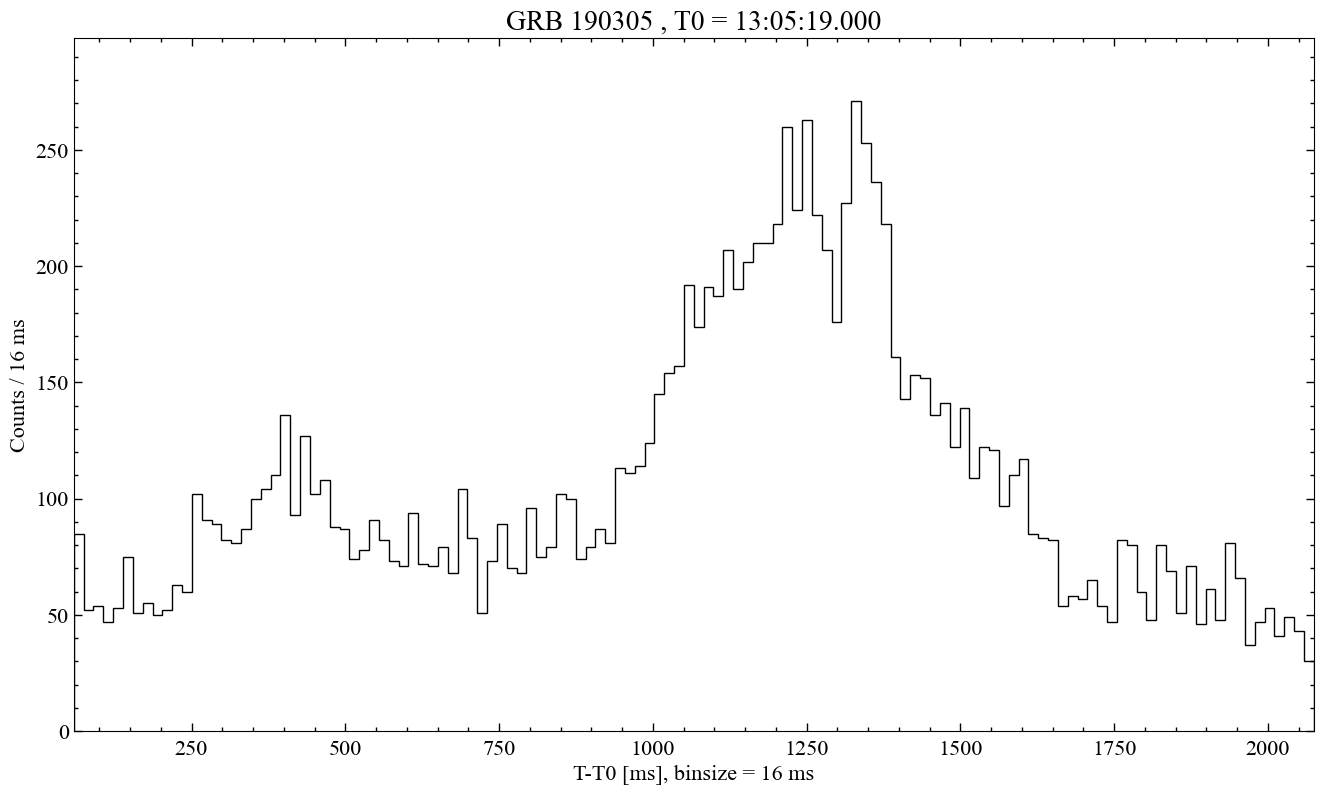

In [14]:
df_burst = df_harvest.truncate(before=22564,after=36018)
tus_burst = df_burst['tus'].to_numpy(dtype=np.float64)
print(tus_burst[0],tus_burst[-1])
T0 = datetime.fromisoformat('2019-03-05T13:05:19')
plot_HED(tus_arr=tus_burst*1e6,binsize=16,T0=T0)

## Cross Correlation

-0.256
1.744


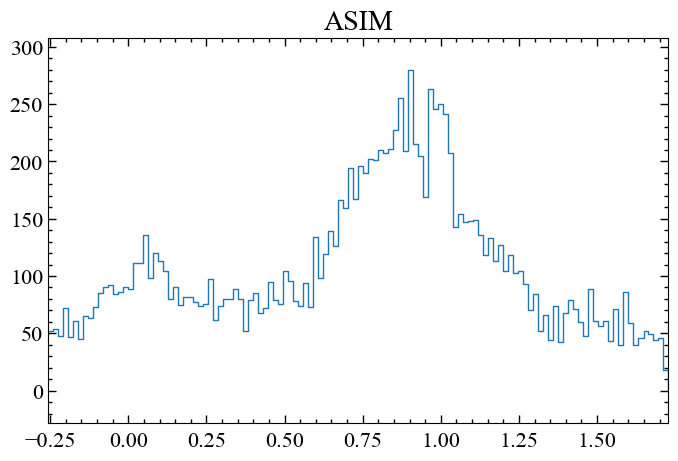

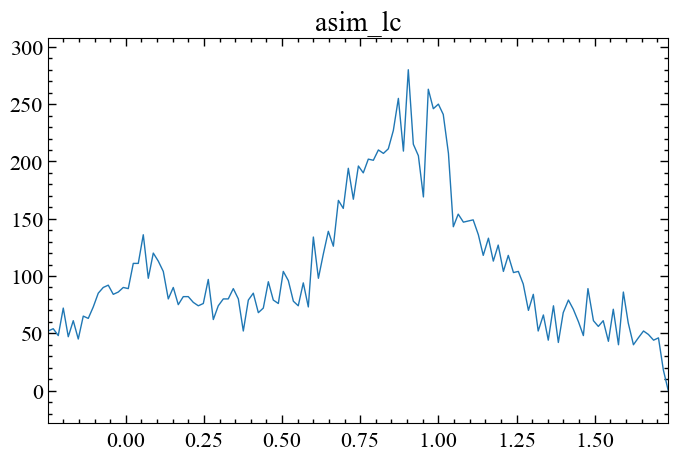

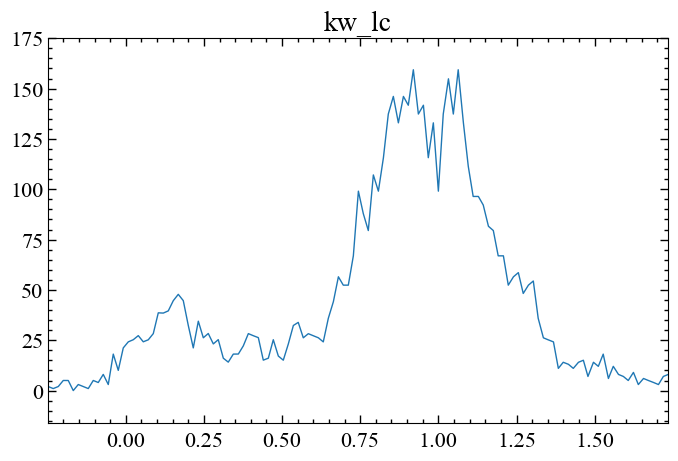

In [15]:
tlagg_approx = -0.35

kw_filename = "GRB190305A_16ms.txt"
kw_file = kw_lc_path + kw_filename
binsize=0.016

kw_df = pd.read_csv(kw_file,sep='\s+')
kw_bin_lo,kw_bin_hi,G1,G2,G3= kw_df["Ti"].to_numpy(dtype=np.float16), kw_df["Tf"].to_numpy(dtype=np.float16),kw_df["G1"].to_numpy(dtype=np.float16), kw_df["G2"].to_numpy(dtype=np.float16), kw_df["G3"].to_numpy(dtype=np.float16)

#kw_dt = np.round(np.diff(kw_bin_lo),3)
#i_stop_kw = np.where(kw_dt>2*binsize)[0][0]

#cutting LC at T0+1.5 s, so that both LC's have 2s of data
i_start_kw = find_nearest(kw_bin_lo,-0.25)
print(kw_bin_lo[i_start_kw])
i_stop_kw = find_nearest(kw_bin_lo,1.75)
print(kw_bin_lo[i_stop_kw])


kw_bin_lo, kw_bin_hi, G1, G2, G3 = kw_bin_lo[i_start_kw:i_stop_kw], kw_bin_hi[i_start_kw:i_stop_kw], G1[i_start_kw:i_stop_kw],G2[i_start_kw:i_stop_kw], G3[i_start_kw:i_stop_kw]
kwCounts = G3
kw_lc = LC(time=np.round(kw_bin_lo + binsize/2,3), counts=kwCounts, skip_checks=True,dt=binsize)

tus_burst += tlagg_approx
hist = np.histogram(tus_burst,bins=np.append(kw_bin_lo,kw_bin_hi[-1])) #using KW bins
asimCounts,asimEdges = hist[0],hist[1]

plt.step(x=asimEdges[:-1],y=asimCounts,where="post")
plt.title("ASIM")
plt.show()

asim_lc = LC(time=np.round(kw_bin_lo + binsize/2,3), counts=asimCounts, skip_checks=True,dt=binsize)
asim_lc.plot(title='asim_lc')
kw_lc.plot(title='kw_lc')

Total lagg (s):  -0.302 | CC lagg:  0.048   tlagg_approx:  -0.35


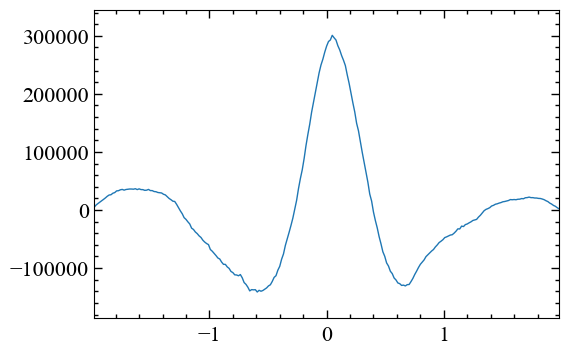

<AxesSubplot:>

In [16]:
CC = CrossCorrelation(kw_lc,asim_lc,mode="full")
CClagg=CC.time_shift
tlagg = tlagg_approx + CClagg
print("Total lagg (s): ", tlagg, "| CC lagg: ", CClagg, '  tlagg_approx: ', tlagg_approx)
CC.plot()

dau/det starting from index 1
tus array given in seconds
safety time:  0.154 % removed
tus given in seconds
0.058593278000000006 2.067231917
tus array OK ...


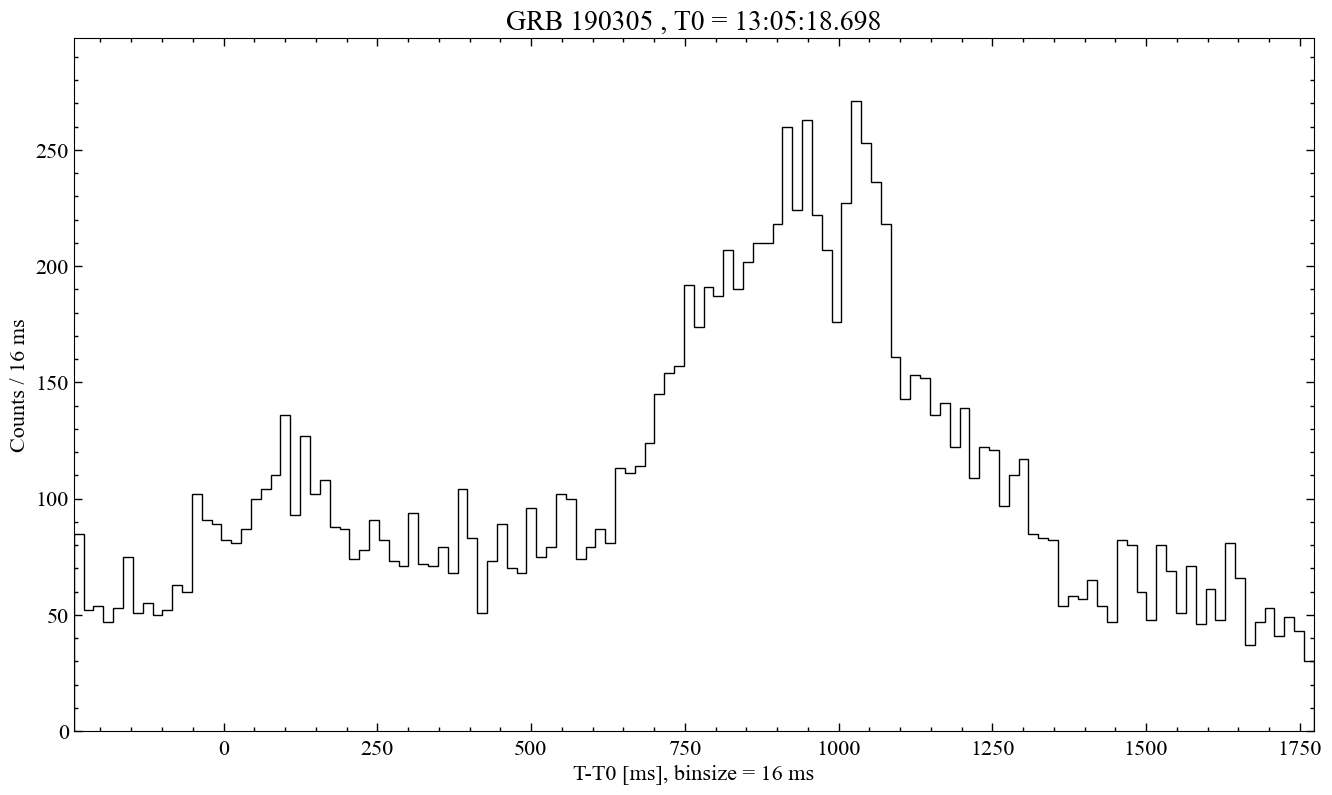

In [20]:
tlagg = -0.302

df_harvest = harvest_data(fn='2019_3_5_13_5_19',T0='2019-03-05T13:05:19')
df_harvest.sort_values(by='tus',inplace=True,ignore_index=True)
df_burst = df_harvest.truncate(before=22564,after=36018)
print(tus_burst[0],tus_burst[-1])

df_burst['tus'] = df_burst['tus'].to_numpy() + tlagg
tus_burst = df_burst['tus'].to_numpy()
plot_HED(tus_arr=tus_burst*1e6,binsize=16,T0=T0+timedelta(seconds=tlagg))

## burst binning keV

In [21]:
i_hed, j_hed = find_nearest(tus_burst,0.768),find_nearest(tus_burst,1.280)
len(tus_burst[i_hed:j_hed])/(tus_burst[i_hed:j_hed][-1]-tus_burst[i_hed:j_hed][0])

11603.484757604589

In [27]:
(6877/4568)**-1

0.6642431292714847

In [162]:
#estimation of count rate for burst interval
5939/0.512

11599.609375

In [123]:
df_keV_burst,tt_check = keV_hist(df_burst,time_interval=(0.768,1.280),keV_interval='max',convert_seconds=False,check_LC=True)

Computing whole spectrum (10-1e5 keV)
n triggers in time interval  5940
n triggers are within bounds  5940
keV bins are set for HED
Energies binned!


In [127]:
print(T0+timedelta(seconds=tlagg))

2019-03-05 13:05:18.698000


## PHA

In [137]:
PHA_dict = {
'USER': ['Andreas Ramsli','Username of creator of this fits file'], #<str>
'T0TIME':['2019-03-05T13:05:18.698','Trigger time UT format=YYYY-MM-DDThh:mm:ss.fff'], #<str> 
'TSTART': [0.768,'[s] Start time of spectrum accumulation'], #<float> [s] Start time of spectrum accumulation relative to T0TIME
'TSTOP': [1.280,'End time of spectrum accumulation'], #<float> [s]
'EXPOSURE': [0.512,'[s] Integration time in seconds for the PHA data'], #<float> 
'OBJECT': ['GRB190305A','Name of the observed object'], #<str> 
'RA_OBJ': [340.399,'[deg] RA of source'], #<float> 
'DEC_OBJ':  [-10.588,'[deg] Dec of source'], #<float>
'BACKFILE': ['GRB190305A.bak','Background FITS file'], #<str> ('example.bak')
'RESPFILE': ['GRB190305A.rsp','Response FITS file'], #<str> ('example.rsp')
'FILENAME': ['GRB190305A.pha','PHA filename'] #<str>  ('example.pha')
}
#More keys can be declated. Set generatePHA(see_template=True) to view avalible keys,values & comments from the template HDR's


In [138]:
burst_counts = df_keV_burst['counts'].to_numpy()[1:]
stat_err_burst = df_keV_burst['poisson_error_counts'].to_numpy()[1:]
bin_lo = df_keV_burst['bins_keV'].to_numpy()[:-1]
bin_hi = df_keV_burst['bins_keV'].to_numpy()[1:]

In [139]:
generatePHA(PHA_dict=PHA_dict, counts=burst_counts, stat_err=stat_err_burst, bin_lo=bin_lo, bin_hi=bin_hi, see_headers=False)

## RSP

In [145]:
RSP_dict = {
    'USER': ['Andreas Ramsli','Username of creator of this fits file'], #<str>
    'T0TIME':['2019-03-05T13:05:18.698','Trigger time UT format=YYYY-MM-DDThh:mm:ss.fff'], #<str> 
    'TSTART': [0.768,'[s] Start time of spectrum accumulation'], #<float> [s] Start time of spectrum accumulation relative to T0TIME
    'TSTOP': [1.280,'End time of spectrum accumulation'], #<float> [s]
    'EXPOSURE': [0.512,'[s] Integration time in seconds for the PHA data'], #<float> 
    'OBJECT': ['GRB190305A','Name of the observed object'], #<str> 
    'RA_OBJ': [340.399,'[deg] RA of source'], #<float> 
    'DEC_OBJ':  [-10.588,'[deg] Dec of source'], #<float>
    'FILENAME': ['GRB190305A.rsp','RSP filename'] #<str>  ('example.pha')
}

In [143]:
theta,phi=133.904,-2.076
find_DRM_file(dir_path='/Home/siv30/wad005/master/HED_DRM/data/',
             theta=theta,phi=phi)

'HED_drm_mats_135.00_0.00.txt'

In [146]:
generateRSP(RSP_dict=RSP_dict, 
            DRM_fname='HED_drm_mats_135.00_0.00.txt', 
            bin_lo=bin_lo,
            bin_hi=bin_hi,
            theta=theta,
            phi=phi,
            see_headers=False)

# estimation of count rate for kw

In [160]:
i = find_nearest(kw_bin_lo,0.768)
j = find_nearest(kw_bin_lo,1.280)
kw_bin_lo[i:j]

array([0.768, 0.784, 0.8  , 0.816, 0.832, 0.848, 0.864, 0.88 , 0.896,
       0.912, 0.928, 0.944, 0.96 , 0.976, 0.992, 1.008, 1.024, 1.04 ,
       1.056, 1.072, 1.088, 1.104, 1.12 , 1.136, 1.152, 1.168, 1.184,
       1.2  , 1.216, 1.232, 1.248, 1.264], dtype=float16)

In [163]:
#estimation of count rate
sum(kwCounts[i:j])/(len(kwCounts[i:j])*0.016)

6877.3193359375

In [4]:
#count rate found in xspec: 3864 counts/s

#net count rate for HED in xspec: 583 counts/s
#that means that the background is very high for HED.